In [1]:
# ============================================================================
# NOTEBOOK : Exploration et Ingestion des Données E-commerce
# Date: 2024
# ============================================================================

# %% [markdown]
# # 📊 E-commerce Data Analysis - Exploration Initiale
# 
# **Objectifs :**
# - Charger et explorer les données brutes
# - Identifier les problèmes de qualité
# - Développer les fonctions de nettoyage
# - Préparer les données pour la segmentation RFM

# %% [markdown]
# ## 🔧 Setup et Configuration

# %%
# IMPORTS ESSENTIELS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')

print("✅ Imports réussis")
print(f"📊 Pandas version: {pd.__version__}")
print(f"📊 Numpy version: {np.__version__}")




✅ Imports réussis
📊 Pandas version: 2.3.1
📊 Numpy version: 2.3.1


In [2]:
# %% [markdown]
# ## 📁 Chargement des Données
data_path = "C:/Users/Moi/E-commerce_Marketing_Analytics/data/raw/online_retail_II.csv"  

print(f"🔍 Tentative de chargement depuis: {data_path}")

try:
    # Chargement des données
    df = pd.read_csv(data_path)
    
    print(f"🎉 Données chargées avec succès !")
    print(f"📊 Shape: {df.shape}")
    print(f"📋 Colonnes: {list(df.columns)}")
    
    # Premier aperçu
    print("\n" + "="*50)
    print("📖 PREMIER APERÇU DES DONNÉES")
    print("="*50)
    
except FileNotFoundError:
    print(f"❌ Fichier non trouvé : {data_path}")
    print("💡 Vérifiez le chemin et le nom du fichier")
    print("📁 Contenu du dossier data/raw/:")
    import os
    if os.path.exists("data/raw/"):
        files = os.listdir("data/raw/")
        for file in files:
            print(f"   - {file}")
    
except Exception as e:
    print(f"❌ Erreur : {e}")


🔍 Tentative de chargement depuis: C:/Users/Moi/E-commerce_Marketing_Analytics/data/raw/online_retail_II.csv
🎉 Données chargées avec succès !
📊 Shape: (1067371, 8)
📋 Colonnes: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

📖 PREMIER APERÇU DES DONNÉES


In [3]:
display(df.head())

print("\n" + "=" * 60)
print("📊 INFORMATIONS GÉNÉRALES")
print("=" * 60)

# Informations sur le dataset
print(f"📊 Nombre de lignes: {len(df):,}")
print(f"📊 Nombre de colonnes: {len(df.columns)}")

# %% [markdown]
# ## 🔍 ANALYSE DÉTAILLÉE DES COLONNES

# %%
# ANALYSONS CHAQUE COLONNE
print("🔍 ANALYSE DÉTAILLÉE DES COLONNES")
print("=" * 60)

for col in df.columns:
    print(f"\n📋 COLONNE: {col}")
    print(f"   - Type: {df[col].dtype}")
    print(f"   - Valeurs manquantes: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
    print(f"   - Valeurs uniques: {df[col].nunique()}")
    
    # Aperçu des valeurs selon le type
    if df[col].dtype == 'object':
        print(f"   - Exemples: {df[col].dropna().head(3).tolist()}")
    else:
        print(f"   - Min: {df[col].min()}, Max: {df[col].max()}")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



📊 INFORMATIONS GÉNÉRALES
📊 Nombre de lignes: 1,067,371
📊 Nombre de colonnes: 8
🔍 ANALYSE DÉTAILLÉE DES COLONNES

📋 COLONNE: Invoice
   - Type: object
   - Valeurs manquantes: 0 (0.0%)
   - Valeurs uniques: 53628
   - Exemples: ['489434', '489434', '489434']

📋 COLONNE: StockCode
   - Type: object
   - Valeurs manquantes: 0 (0.0%)
   - Valeurs uniques: 5305
   - Exemples: ['85048', '79323P', '79323W']

📋 COLONNE: Description
   - Type: object
   - Valeurs manquantes: 4382 (0.4%)
   - Valeurs uniques: 5698
   - Exemples: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS', ' WHITE CHERRY LIGHTS']

📋 COLONNE: Quantity
   - Type: int64
   - Valeurs manquantes: 0 (0.0%)
   - Valeurs uniques: 1057
   - Min: -80995, Max: 80995

📋 COLONNE: InvoiceDate
   - Type: object
   - Valeurs manquantes: 0 (0.0%)
   - Valeurs uniques: 47635
   - Exemples: ['2009-12-01 07:45:00', '2009-12-01 07:45:00', '2009-12-01 07:45:00']

📋 COLONNE: Price
   - Type: float64
   - Valeurs manquantes: 0 (0.0%)


📋 APERÇU DES DONNÉES

🔸 Premières lignes :


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



🔸 Dernières lignes :


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France



🔸 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
🕳️ ANALYSE DES DONNÉES MANQUANTES
       Colonne  Valeurs_manquantes  Pourcentage
0      Invoice                   0     0.000000
1    StockCode                   0     0.000000
2  Description                4382     0.410541
3     Quantity                   0     0.000000
4  InvoiceDate                   0     0.000000
5        Price                   0 

<Figure size 1000x600 with 0 Axes>

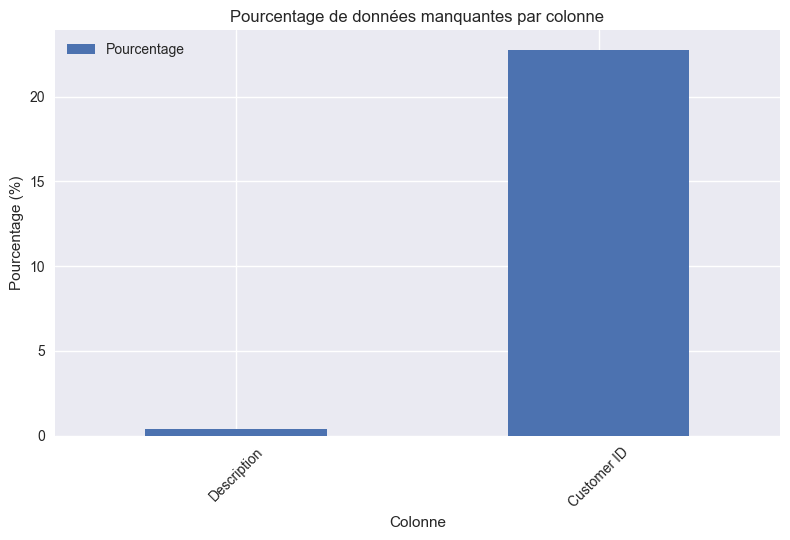

🏷️ ANALYSE DES TYPES DE DONNÉES

🔸 Types actuels :
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

🔸 Colonnes numériques :
['Quantity', 'Price', 'Customer ID']

🔸 Colonnes objets :
['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']

🔸 Analyse InvoiceDate :
Type actuel : object
Exemple de valeurs : ['2009-12-01 07:45:00', '2009-12-01 07:45:00', '2009-12-01 07:45:00']


In [6]:
# ============================================================================
# 🔍 1. APERÇU GÉNÉRAL DES DONNÉES
# ============================================================================

print("📋 APERÇU DES DONNÉES")
print("=" * 30)

# Premières lignes
print("\n🔸 Premières lignes :")
display(df.head())

# Dernières lignes
print("\n🔸 Dernières lignes :")
display(df.tail())

# Infos générales
print("\n🔸 Informations générales :")
df.info()

# ============================================================================
# 🔍 2. ANALYSE DES DONNÉES MANQUANTES
# ============================================================================

print("🕳️ ANALYSE DES DONNÉES MANQUANTES")
print("=" * 40)

# Comptage des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_data.index,
    'Valeurs_manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
})

print(missing_df)

# Visualisation des données manquantes
plt.figure(figsize=(10, 6))
missing_df[missing_df['Valeurs_manquantes'] > 0].plot(x='Colonne', y='Pourcentage', kind='bar')
plt.title('Pourcentage de données manquantes par colonne')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# 🔍 3. ANALYSE DES TYPES DE DONNÉES
# ============================================================================

print("🏷️ ANALYSE DES TYPES DE DONNÉES")
print("=" * 35)

# Types actuels
print("\n🔸 Types actuels :")
print(df.dtypes)

# Vérification des colonnes numériques
print("\n🔸 Colonnes numériques :")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)

# Vérification des colonnes objets
print("\n🔸 Colonnes objets :")
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(object_cols)

# Analyse spécifique de la colonne InvoiceDate
print("\n🔸 Analyse InvoiceDate :")
print(f"Type actuel : {df['InvoiceDate'].dtype}")
print(f"Exemple de valeurs : {df['InvoiceDate'].head(3).tolist()}")

🔴 PROBLÈMES MAJEURS IDENTIFIÉS :
⚠️ DONNÉES MANQUANTES CRITIQUES :

Customer ID : 243,007 manquantes (22.77%) → ÉNORME PROBLÈME !

Description : 4,382 manquantes (0.41%) → Gérable

🏷️ TYPES DE DONNÉES À CORRIGER :

InvoiceDate : object → doit être datetime

Customer ID : float64 → doit être string ou int

🔄 ANALYSE DES DOUBLONS
🔸 Nombre total de doublons : 34,335
🔸 Pourcentage de doublons : 3.22%
🔸 Factures dupliquées : 1,013,743

🔸 Exemple de doublons :


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


🔸 Combinaisons Invoice+StockCode dupliquées : 45,947
📊 ANALYSE DES OUTLIERS

🔸 ANALYSE QUANTITY :
Min : -80995
Max : 80995
Médiane : 3.0
Moyenne : 9.94
🚨 Quantités négatives : 22,950 (2.15%)

🔸 ANALYSE PRICE :
Min : -53594.36
Max : 38970.0
Médiane : 2.1
Moyenne : 4.65
🚨 Prix négatifs : 5
🚨 Prix à zéro : 6,202


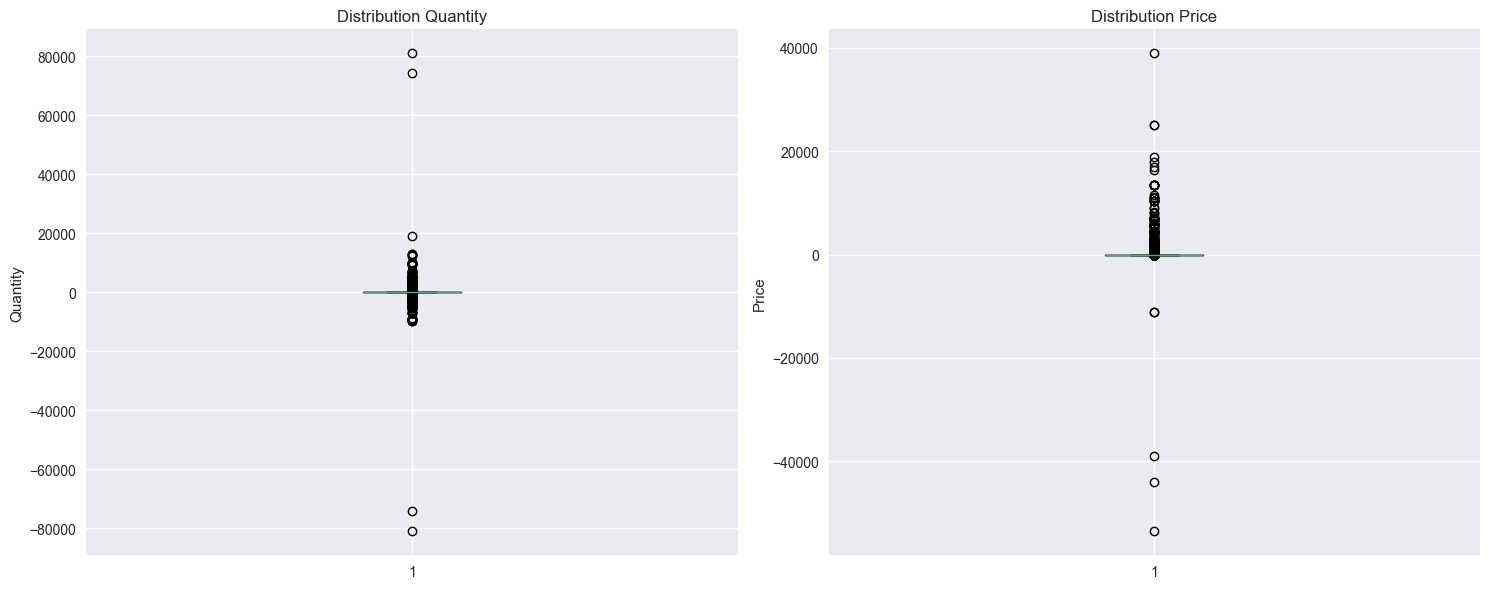

In [7]:
# ============================================================================
# 🔍 4. ANALYSE DES DOUBLONS
# ============================================================================

print("🔄 ANALYSE DES DOUBLONS")
print("=" * 25)

# Doublons totaux
total_duplicates = df.duplicated().sum()
print(f"🔸 Nombre total de doublons : {total_duplicates:,}")
print(f"🔸 Pourcentage de doublons : {(total_duplicates/len(df))*100:.2f}%")

# Doublons par colonne clé
duplicate_invoices = df['Invoice'].duplicated().sum()
print(f"🔸 Factures dupliquées : {duplicate_invoices:,}")

# Exemple de doublons si ils existent
if total_duplicates > 0:
    print("\n🔸 Exemple de doublons :")
    duplicate_rows = df[df.duplicated(keep=False)].head(10)
    display(duplicate_rows)

# Analyse des combinaisons Invoice + StockCode
combo_duplicates = df.duplicated(subset=['Invoice', 'StockCode']).sum()
print(f"🔸 Combinaisons Invoice+StockCode dupliquées : {combo_duplicates:,}")

# ============================================================================
# 🔍 5. ANALYSE DES OUTLIERS (VALEURS ABERRANTES)
# ============================================================================

print("📊 ANALYSE DES OUTLIERS")
print("=" * 25)

# Analyse de la colonne Quantity
print("\n🔸 ANALYSE QUANTITY :")
print(f"Min : {df['Quantity'].min()}")
print(f"Max : {df['Quantity'].max()}")
print(f"Médiane : {df['Quantity'].median()}")
print(f"Moyenne : {df['Quantity'].mean():.2f}")

# Valeurs négatives dans Quantity
negative_qty = (df['Quantity'] < 0).sum()
print(f"🚨 Quantités négatives : {negative_qty:,} ({(negative_qty/len(df))*100:.2f}%)")

# Analyse de la colonne Price
print("\n🔸 ANALYSE PRICE :")
print(f"Min : {df['Price'].min()}")
print(f"Max : {df['Price'].max()}")
print(f"Médiane : {df['Price'].median()}")
print(f"Moyenne : {df['Price'].mean():.2f}")

# Prix négatifs ou nuls
negative_price = (df['Price'] < 0).sum()
zero_price = (df['Price'] == 0).sum()
print(f"🚨 Prix négatifs : {negative_price:,}")
print(f"🚨 Prix à zéro : {zero_price:,}")

# Boxplot pour visualiser les outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Quantity boxplot
axes[0].boxplot(df['Quantity'].dropna())
axes[0].set_title('Distribution Quantity')
axes[0].set_ylabel('Quantity')

# Price boxplot
axes[1].boxplot(df['Price'].dropna())
axes[1].set_title('Distribution Price')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

📊 CONSTATS CRITIQUES :
🔴 PROBLÈMES GRAVES :
💸 PRIX ABERRANTS :

Prix MIN : -53,594.36 → Prix négatifs (remboursements ?)
Prix MAX : 38,970.0 → Prix extrêmes
6,202 prix à zéro → Produits gratuits ou erreurs ?
📦 QUANTITÉS PROBLÉMATIQUES :

Quantity MIN : -80,995 → Retours massifs !
Quantity MAX : 80,995 → Commandes énormes
22,950 quantités négatives (2.15%) → Retours clients
🔄 DOUBLONS SIGNIFICATIFS :

34,335 doublons totaux (3.22%)
45,947 combinaisons Invoice+StockCode dupliquées

In [8]:
# ============================================================================
# 🔍 6. ANALYSE DE COHÉRENCE DES DONNÉES
# ============================================================================

print("🔍 ANALYSE DE COHÉRENCE")
print("=" * 25)

# Analyse des factures avec quantités/prix négatifs
print("🔸 ANALYSE DES RETOURS/REMBOURSEMENTS :")
returns = df[df['Quantity'] < 0]
print(f"Nombre de lignes de retours : {len(returns):,}")

# Analyse des factures commençant par 'C' (probablement des annulations)
c_invoices = df[df['Invoice'].str.startswith('C', na=False)]
print(f"Factures commençant par 'C' : {len(c_invoices):,}")

# Vérification cohérence Invoice/Quantity négative
print("\n🔸 COHÉRENCE FACTURES 'C' vs QUANTITÉS NÉGATIVES :")
c_with_negative = c_invoices[c_invoices['Quantity'] < 0]
print(f"Factures 'C' avec quantités négatives : {len(c_with_negative):,}")

# Analyse des StockCodes spéciaux
special_codes = df[df['StockCode'].str.contains(r'^[A-Z]+$', na=False, regex=True)]
print(f"\n🔸 StockCodes spéciaux (lettres uniquement) : {len(special_codes):,}")
print("Exemples :")
print(special_codes['StockCode'].value_counts().head())

# Analyse des prix et quantités cohérents
print("\n🔸 COHÉRENCE PRIX/QUANTITÉ :")
positive_both = df[(df['Price'] > 0) & (df['Quantity'] > 0)]
negative_both = df[(df['Price'] < 0) & (df['Quantity'] < 0)]
print(f"Transactions normales (Prix>0, Qty>0) : {len(positive_both):,}")
print(f"Retours cohérents (Prix<0, Qty<0) : {len(negative_both):,}")


🔍 ANALYSE DE COHÉRENCE
🔸 ANALYSE DES RETOURS/REMBOURSEMENTS :
Nombre de lignes de retours : 22,950
Factures commençant par 'C' : 19,494

🔸 COHÉRENCE FACTURES 'C' vs QUANTITÉS NÉGATIVES :
Factures 'C' avec quantités négatives : 19,493

🔸 StockCodes spéciaux (lettres uniquement) : 5,472
Exemples :
StockCode
POST    2122
DOT     1446
M       1421
D        177
S        104
Name: count, dtype: int64

🔸 COHÉRENCE PRIX/QUANTITÉ :
Transactions normales (Prix>0, Qty>0) : 1,041,671
Retours cohérents (Prix<0, Qty<0) : 0


In [9]:
# ============================================================================
# 🔍 7. ANALYSE DE CARDINALITÉ
# ============================================================================

print("📊 ANALYSE DE CARDINALITÉ")
print("=" * 30)

# Cardinalité de chaque colonne
print("🔸 CARDINALITÉ PAR COLONNE :")
for col in df.columns:
    unique_count = df[col].nunique()
    unique_percent = (unique_count / len(df)) * 100
    print(f"{col:15} : {unique_count:8,} valeurs uniques ({unique_percent:.2f}%)")

# Analyse détaillée des colonnes clés
print("\n🔸 ANALYSE DÉTAILLÉE :")

# Pays
print(f"\nPays ({df['Country'].nunique()} unique) :")
print(df['Country'].value_counts().head(10))

# Clients (sans les NaN)
customers_count = df['Customer ID'].nunique()
print(f"\nClients uniques : {customers_count:,}")

# Produits
products_count = df['StockCode'].nunique()
print(f"Produits uniques : {products_count:,}")

# Factures
invoices_count = df['Invoice'].nunique()
print(f"Factures uniques : {invoices_count:,}")


📊 ANALYSE DE CARDINALITÉ
🔸 CARDINALITÉ PAR COLONNE :
Invoice         :   53,628 valeurs uniques (5.02%)
StockCode       :    5,305 valeurs uniques (0.50%)
Description     :    5,698 valeurs uniques (0.53%)
Quantity        :    1,057 valeurs uniques (0.10%)
InvoiceDate     :   47,635 valeurs uniques (4.46%)
Price           :    2,807 valeurs uniques (0.26%)
Customer ID     :    5,942 valeurs uniques (0.56%)
Country         :       43 valeurs uniques (0.00%)

🔸 ANALYSE DÉTAILLÉE :

Pays (43 unique) :
Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: count, dtype: int64

Clients uniques : 5,942
Produits uniques : 5,305
Factures uniques : 53,628


📈 ANALYSE DES DISTRIBUTIONS
🔸 PÉRIODE TEMPORELLE :
Date début : 2009-12-01 07:45:00
Date fin : 2011-12-09 12:50:00
Durée : 738 jours

🔸 DISTRIBUTION MENSUELLE :
Month
2009-12    45228
2010-01    31555
2010-02    29388
2010-03    41511
2010-04    34057
2010-05    35323
2010-06    39983
2010-07    33383
2010-08    33306
2010-09    42091
2010-10    59098
2010-11    78015
2010-12    65004
2011-01    35147
2011-02    27707
2011-03    36748
2011-04    29916
2011-05    37030
2011-06    36874
2011-07    39518
2011-08    35284
2011-09    50226
2011-10    60742
2011-11    84711
2011-12    25526
Freq: M, Name: count, dtype: int64


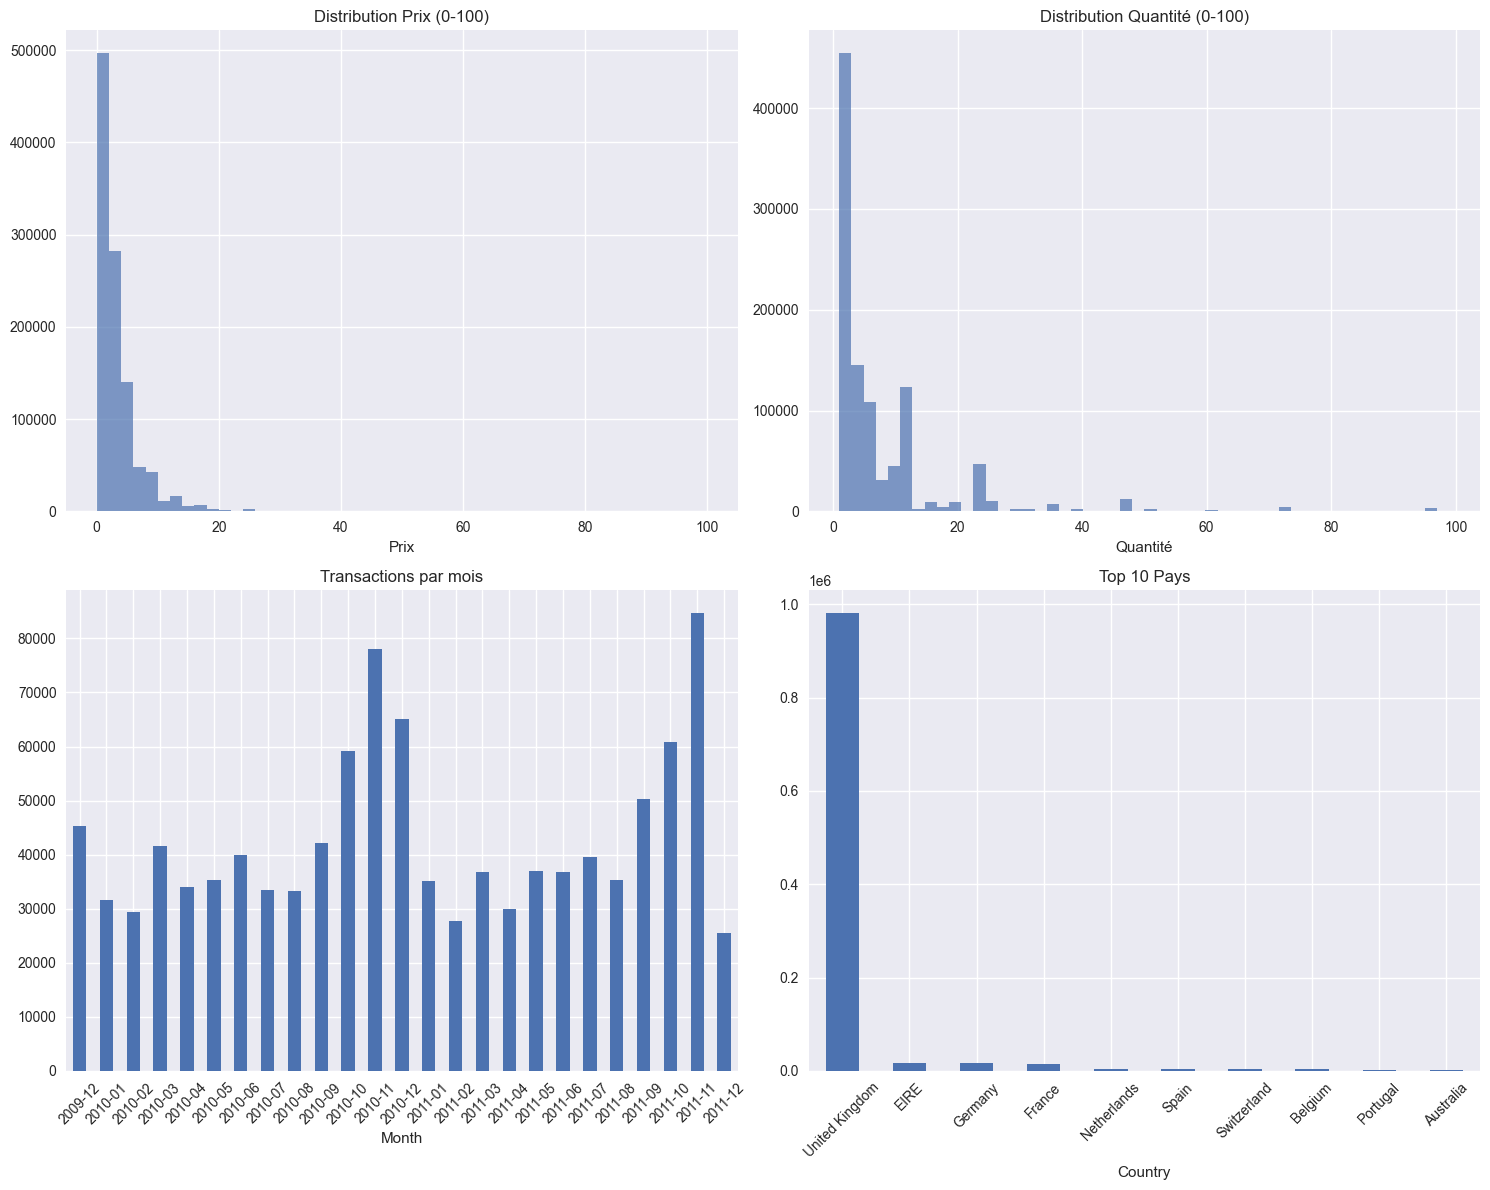

In [10]:
# ============================================================================
# 🔍 8. ANALYSE DES DISTRIBUTIONS
# ============================================================================

print("📈 ANALYSE DES DISTRIBUTIONS")
print("=" * 30)

# Période temporelle
df_temp = df.copy()
df_temp['InvoiceDate'] = pd.to_datetime(df_temp['InvoiceDate'])

print("🔸 PÉRIODE TEMPORELLE :")
print(f"Date début : {df_temp['InvoiceDate'].min()}")
print(f"Date fin : {df_temp['InvoiceDate'].max()}")
print(f"Durée : {(df_temp['InvoiceDate'].max() - df_temp['InvoiceDate'].min()).days} jours")

# Distribution par mois
df_temp['Month'] = df_temp['InvoiceDate'].dt.to_period('M')
monthly_dist = df_temp['Month'].value_counts().sort_index()
print(f"\n🔸 DISTRIBUTION MENSUELLE :")
print(monthly_dist)

# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution des prix (sans outliers extrêmes)
price_clean = df[(df['Price'] > 0) & (df['Price'] < 100)]
axes[0,0].hist(price_clean['Price'], bins=50, alpha=0.7)
axes[0,0].set_title('Distribution Prix (0-100)')
axes[0,0].set_xlabel('Prix')

# Distribution des quantités (sans outliers extrêmes)
qty_clean = df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]
axes[0,1].hist(qty_clean['Quantity'], bins=50, alpha=0.7)
axes[0,1].set_title('Distribution Quantité (0-100)')
axes[0,1].set_xlabel('Quantité')

# Distribution mensuelle
monthly_dist.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Transactions par mois')
axes[1,0].tick_params(axis='x', rotation=45)

# Top 10 pays
df['Country'].value_counts().head(10).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Top 10 Pays')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [13]:
# 📋 RAPPORT FINAL - QUALITÉ DES DONNÉES
# ============================================================================

print("📋 RAPPORT FINAL - QUALITÉ DES DONNÉES E-COMMERCE")
print("=" * 55)

# Résumé exécutif
print("\n🎯 RÉSUMÉ EXÉCUTIF :")
print("=" * 20)
print("✅ Dataset e-commerce UK (2009-2011) avec 1,067,371 transactions")
print("✅ Logique métier cohérente pour les retours/annulations")
print("✅ Saisonnalité commerciale claire")
print("🔴 Problèmes de qualité nécessitant nettoyage")

# Problèmes par priorité
print("\n🚨 PROBLÈMES CRITIQUES (PRIORITÉ 1) :")
print("=" * 40)
print("1. Customer ID manquant : 243,007 lignes (22.77%)")
print("2. Description manquante : 4,382 lignes (0.41%)")
print("3. Doublons : 34,335 lignes (3.22%)")
print("4. InvoiceDate : type 'object' → doit être datetime")

print("\n⚠️  PROBLÈMES MOYENS (PRIORITÉ 2) :")
print("=" * 35)
print("1. Prix négatifs : 5 lignes (remboursements)")
print("2. Prix à zéro : 6,202 lignes (produits gratuits?)")
print("3. Quantités négatives : 22,950 lignes (retours)")
print("4. StockCodes spéciaux : 5,472 lignes (services)")

print("\n🔍 PROBLÈMES MINEURS (PRIORITÉ 3) :")
print("=" * 35)
print("1. Outliers prix : jusqu'à 38,970")
print("2. Outliers quantité : jusqu'à 80,995")
print("3. Customer ID en float64 → int/string")

# Recommandations pour le nettoyage
print("\n🛠️  RECOMMANDATIONS NETTOYAGE :")
print("=" * 35)
print("1. Convertir InvoiceDate en datetime")
print("2. Gérer les Customer ID manquants (segmentation)")
print("3. Supprimer les doublons exacts")
print("4. Créer des indicateurs pour retours/services")
print("5. Traiter les prix/quantités aberrants")
print("6. Optimiser les types de données")

# Métriques pour le pipeline
print("\n📊 MÉTRIQUES QUALITÉ (POUR PIPELINE) :")
print("=" * 40)
total_issues = 243007 + 4382 + 34335 + 5 + 6202 + 22950
clean_rate = ((len(df) - total_issues) / len(df)) * 100
print(f"Taux de données 'propres' : {clean_rate:.1f}%")
print(f"Lignes nécessitant traitement : {total_issues:,}")
print(f"Complexité nettoyage : ÉLEVÉE (multiples problèmes)")

📋 RAPPORT FINAL - QUALITÉ DES DONNÉES E-COMMERCE

🎯 RÉSUMÉ EXÉCUTIF :
✅ Dataset e-commerce UK (2009-2011) avec 1,067,371 transactions
✅ Logique métier cohérente pour les retours/annulations
✅ Saisonnalité commerciale claire
🔴 Problèmes de qualité nécessitant nettoyage

🚨 PROBLÈMES CRITIQUES (PRIORITÉ 1) :
1. Customer ID manquant : 243,007 lignes (22.77%)
2. Description manquante : 4,382 lignes (0.41%)
3. Doublons : 34,335 lignes (3.22%)
4. InvoiceDate : type 'object' → doit être datetime

⚠️  PROBLÈMES MOYENS (PRIORITÉ 2) :
1. Prix négatifs : 5 lignes (remboursements)
2. Prix à zéro : 6,202 lignes (produits gratuits?)
3. Quantités négatives : 22,950 lignes (retours)
4. StockCodes spéciaux : 5,472 lignes (services)

🔍 PROBLÈMES MINEURS (PRIORITÉ 3) :
1. Outliers prix : jusqu'à 38,970
2. Outliers quantité : jusqu'à 80,995
3. Customer ID en float64 → int/string

🛠️  RECOMMANDATIONS NETTOYAGE :
1. Convertir InvoiceDate en datetime
2. Gérer les Customer ID manquants (segmentation)
3. Suppri